In [1]:
import numpy as np
import torch
import os
import matplotlib.pyplot as plt
import pandas as pd
import train_test_volume
import opnet
from importlib import reload

In [2]:
path = './volume_inversion_net.pth'
dim = 126 # this needs be the size of Lambda_h
num_layers = 10
model = opnet.OperatorNet(dim, num_layers, scalar_output=True)
loss_f = torch.nn.MSELoss()

In [3]:
lr_list = [1e-4]
losses_list=[]
table2 = pd.DataFrame()

In [4]:
if os.path.exists(path):
    model.load_state_dict(torch.load(path))
else:
    print("No old path, creating new one")
    torch.save(model.state_dict(), path)
    model.load_state_dict(torch.load(path))

for lr in lr_list:
    losses_list.append(train_test_volume.train_test(model=model, loss_f=loss_f,lr=lr, name="test",epochs=2000))

No old path, creating new one


In [5]:
epo = np.arange(0,2000,50)
index_x = list(map(str, epo))

In [6]:
index_y = [1e-4]
table1 = pd.DataFrame(losses_list, columns=index_x, index = index_y)
table1.index.name = "lr"
table1.to_csv("./results/Table3.csv", index=True)

In [7]:
path = './volume_inversion_net_relu.pth'
dim = 126
num_layers = 5
model = opnet.OperatorNet(dim, num_layers, scalar_output=True, useReLU=True)
loss_f = torch.nn.MSELoss()
df1 = pd.DataFrame()
losses_list1=[]

In [8]:
if os.path.exists(path):
    model.load_state_dict(torch.load(path))
else:
    print("No old path, creating new one")
    torch.save(model.state_dict(), path)
    model.load_state_dict(torch.load(path))

for lr in lr_list:
    losses_list1.append(train_test_volume.train_test(model=model, loss_f=loss_f,lr=lr, name="test_relu",epochs=2000))

No old path, creating new one


In [9]:
index_y = [1e-4]
df1 = pd.DataFrame(losses_list1, columns=index_x, index = index_y)
df1.index.name = "lr"
df1.to_csv("./results/Table3_relu.csv", index=True)

Text(0, 0.5, 'Loss')

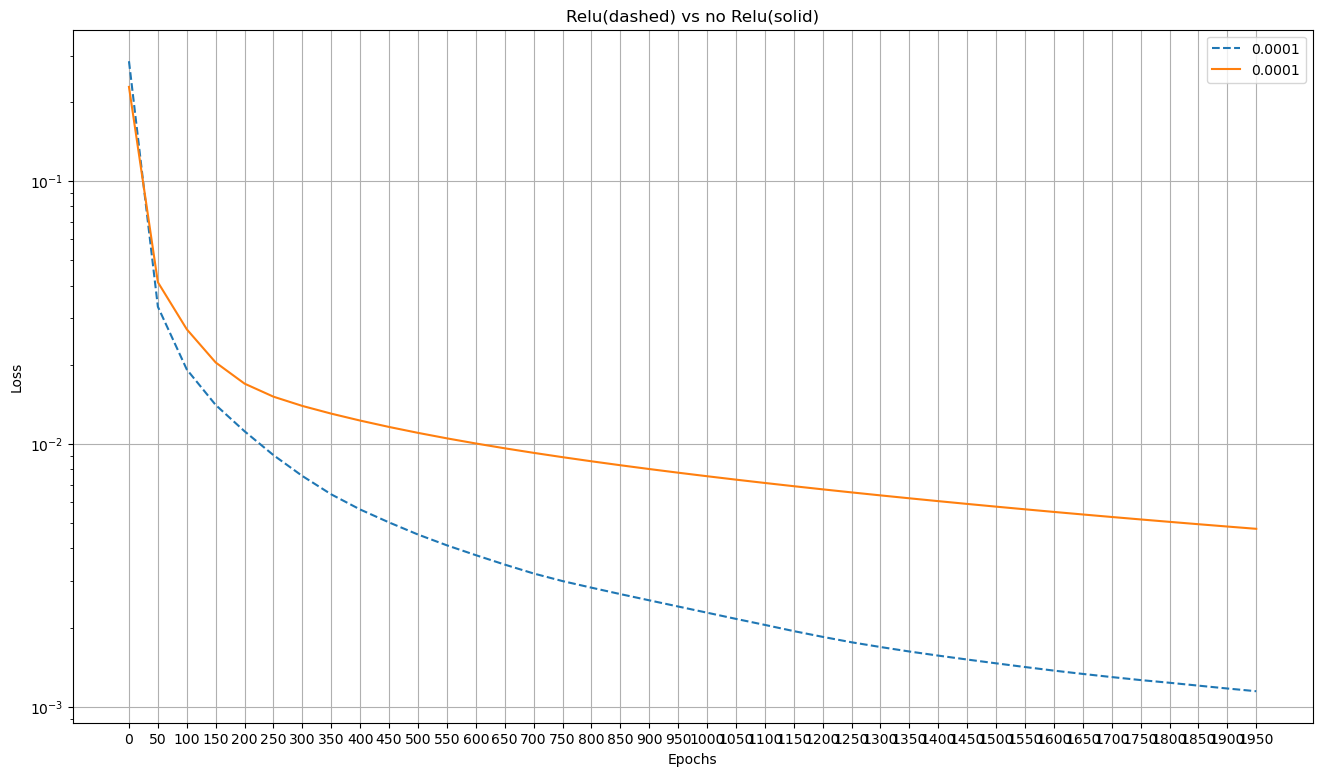

In [10]:
fig, ax = plt.subplots(1,1, figsize = (16,9))
for index, row in df1.iloc[0:,:].iterrows():
    ax.plot(df1.columns, row, label=index, linestyle='--')

for index, row in table1.iloc[0:,:].iterrows():
    ax.plot(table1.columns, row, label = index, linestyle='-')
plt.title("Relu(dashed) vs no Relu(solid)")
plt.grid()
plt.legend()
ax.set_yscale('log')
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [11]:
for i in range(100):
    if i%50==0:
        print(i)

0
50
